In [1]:
# reload packages
%load_ext autoreload
%autoreload 2

### Choose GPU (this may not be needed on your computer)

In [2]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=0


In [3]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [4]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

### load packages

In [5]:
from tfumap.umap import tfUMAP

/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/tfumap/umap.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import umap
import pandas as pd

### Load dataset

In [7]:
import requests
import json
url = "https://raw.githubusercontent.com/duhaime/umap-zoo/03819ed0954b524919671a72f61a56032099ba11/data/json/bison.json"
animal = np.array(json.loads(requests.get(url).text)['3d'])
np.shape(animal)

(50000, 3)

(-1.05789, 0.98789, -0.489245, 0.660145)

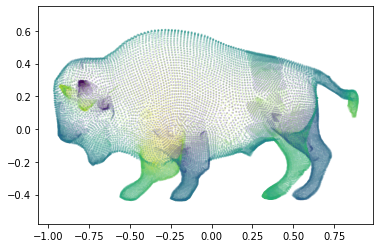

In [8]:
fig, ax = plt.subplots()
ax.scatter(animal[:,2], animal[:,1], s = 1, c = animal[:,0], alpha = 0.1)
ax.axis('equal')

In [9]:
X_train = animal
Y_train = animal[:, 2]
X_train_flat = X_train

### Create model and train

In [10]:
from ivis import Ivis
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

In [11]:
X_scaled = MinMaxScaler().fit_transform(X_train)

In [12]:
# Set ivis parameters
model = Ivis(embedding_dims=2, k=150)

In [13]:
# Generate embeddings
embeddings =z = model.fit_transform(X_scaled)

100%|██████████| 50000/50000 [00:00<00:00, 527723.48it/s]

Building KNN index


Extracting KNN neighbours


100%|██████████| 50000/50000 [00:03<00:00, 16101.41it/s]


Training neural network
Epoch 1/1000
391/391 [==============================] - 2s 5ms/step - loss: 0.2046
Epoch 2/1000
391/391 [==============================] - 2s 5ms/step - loss: 0.1036
Epoch 3/1000
391/391 [==============================] - 2s 5ms/step - loss: 0.0806
Epoch 4/1000
391/391 [==============================] - 2s 5ms/step - loss: 0.0661
Epoch 5/1000
391/391 [==============================] - 2s 5ms/step - loss: 0.0625
Epoch 6/1000
391/391 [==============================] - 2s 5ms/step - loss: 0.0568
Epoch 7/1000
391/391 [==============================] - 2s 5ms/step - loss: 0.0508
Epoch 8/1000
391/391 [==============================] - 2s 5ms/step - loss: 0.0446
Epoch 9/1000
391/391 [==============================] - 2s 5ms/step - loss: 0.0457
Epoch 10/1000
391/391 [==============================] - 2s 5ms/step - loss: 0.0428
Epoch 11/1000
391/391 [==============================] - 2s 6ms/step - loss: 0.0410
Epoch 12/1000
391/391 [==============================] - 2s 6

In [14]:
z = embeddings

### Plot model output

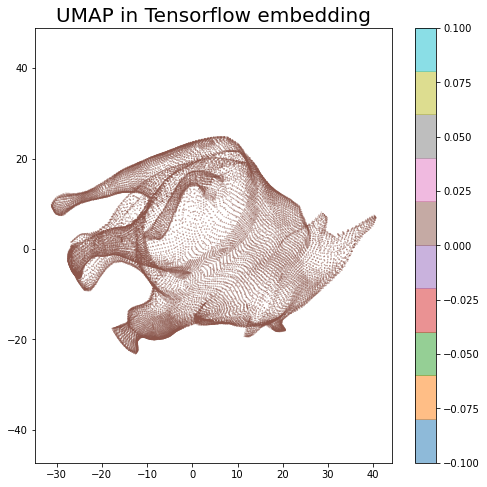

In [15]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
    c=Y_train.astype(int)[:len(z)],
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("UMAP in Tensorflow embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### Save output

In [16]:
from tfumap.paths import ensure_dir, MODEL_DIR

In [17]:
output_dir = MODEL_DIR/'projections'/ 'bison' / 'ivis'
ensure_dir(output_dir)

In [18]:
model.save_model(output_dir / 'model.ivis')

FileExistsError: [Errno 17] File exists: '/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/projections/bison/ivis/model.ivis'

In [19]:
np.save(output_dir / 'z.npy', z)